# Analysis of July 7th 2022 Flight

Goal: 
* Get an estimate for the angle of angles of attack through a "Steady" night flight

In [1]:
## Importing Modules ##
from os import sys
sys.path.append('../')

%matplotlib widget

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.io

from main import flight
from main import analysis
import propellers
import motors
from aircraft import airplane
import cl_finders
import plotly.express as px


In [2]:
# Importing data from BIN files #

#df = main.get_data("Alton", "june15_2022.BIN", "10ms")
#df = main.get_data("Alton", "july7_2022.BIN", "10ms")
#df = main.get_data("Alton","july8_2022.BIN", "100ms")

In [3]:
## Pickling that DF for Later ##

#df.to_pickle("./data/july7_2022_100Hz.pkl")

## Unpickling 
df_100Hz = pd.read_pickle("../data/july7_2022_100Hz.pkl")
#df_60Hz = pd.read_pickle("./data/june15_2022_60Hz.pkl")
#df_1Hz = pd.read_pickle("./data/june15_2022_1Hz.pkl")

df = df_100Hz.interpolate(method="linear")

In [4]:
# Vehicle parameters
prop = propellers.aeronaut185x12() # Using aeronaut 20x8 for this flight
motor = motors.U7V2_280KV()  # Using U7 V2 motor

mass = 12.727 # Estimated with virtual bolt included
span = 6.28
chord = 0.395
createv = airplane(mass, chord, span)

P_systems = 6 # Amount of power consumed by everything except the ESC & motor

In [8]:
############# Main Analysis ###############3
# Attitude 
phi = np.deg2rad(df["RollAngle"].to_numpy())            # Bank angle in radians
pitch = df["PitchAngle"].to_numpy()         # Pitch angle in radians
df["Throttle"] = (df["Throttle"]-1100)*(1.0/800.0)

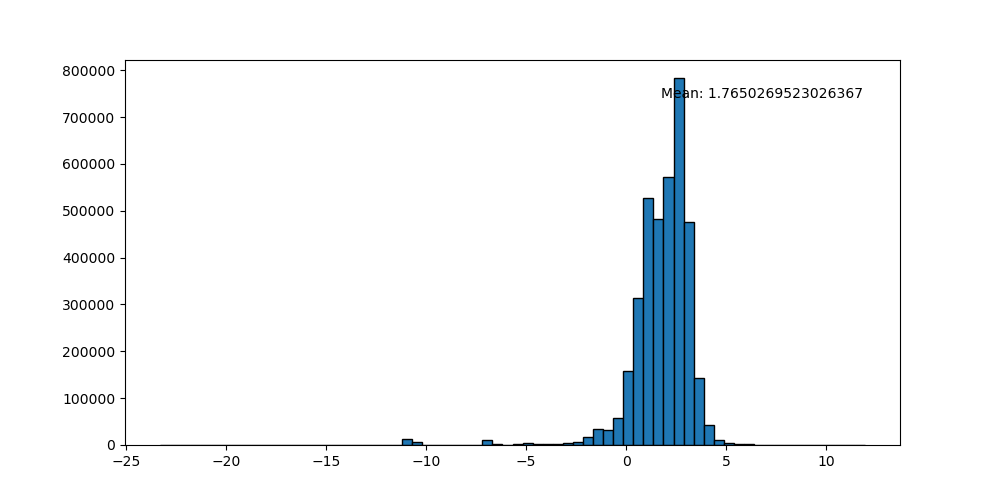

1.7650269523026367


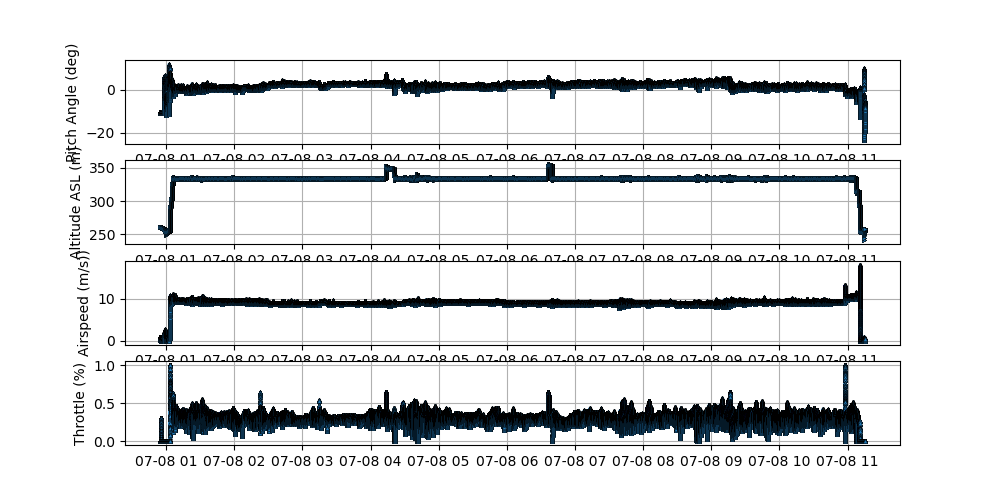

In [9]:
# Plotting Histogram and Time Series of the Pitch Angle

plt.figure(figsize=(10,5))
plt.hist(pitch, bins=70, edgecolor=[0,0,0])
plt.axvline(pitch.mean(), linestyle='--')
min_ylim, max_ylim = plt.ylim()
plt.text(pitch[~np.isnan(pitch)].mean(), 0.9*max_ylim, "Mean: " + str(pitch[~np.isnan(pitch)].mean()))
plt.show()

print(pitch[~np.isnan(pitch)].mean())

plt.figure(figsize=(10,5))
ax0 = plt.subplot(4,1,1)
ax0.plot(df.index, pitch, marker='^', markeredgecolor=[0,0,0], markeredgewidth=0.3, markersize=3)
ax0.grid(True)
ax0.set_ylabel("Pitch Angle (deg)")
ax1 = plt.subplot(4,1,2, sharex=ax0)
ax1.plot(df.index, df.Altitude_POS, marker='>', markeredgecolor=[0,0,0], markeredgewidth=0.3, markersize=3)
ax1.grid(True)
ax1.set_ylabel("Altitude ASL (m)")
ax2 = plt.subplot(4,1,3, sharex=ax0)
ax2.plot(df.index, df.Airspeed_CTUN, marker='^', markeredgecolor=[0,0,0], markeredgewidth=0.3, markersize=3)
ax2.grid(True)
ax2.set_ylabel("Airspeed (m/s))")
ax3 = plt.subplot(4,1,4, sharex=ax0)
ax3.plot(df.index, df.Throttle, marker='^', markeredgecolor=[0,0,0], markeredgewidth=0.3, markersize=3)
ax3.grid(True)
ax3.set_ylabel("Throttle (%)")

plt.show()